### Reading csv

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   

#### at this moment - looking only at Cycling-2023-09-14_06-22-31 - additionally Annotation is empty csv (in all activities) so leaving it

In [2]:
file_paths = [
    ('..//data//Cycling-2023-09-14_06-22-31//Accelerometer.csv', 'Accelerometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//Gravity.csv', 'Gravity'),
    ('..//data//Cycling-2023-09-14_06-22-31//Gyroscope.csv', 'Gyroscope'),
    ('..//data//Cycling-2023-09-14_06-22-31//Location.csv', 'Location'),
    ('..//data//Cycling-2023-09-14_06-22-31//LocationGps.csv', 'LocationGps'),
    ('..//data//Cycling-2023-09-14_06-22-31//LocationNetwork.csv', 'LocationNetwork'),
    ('..//data//Cycling-2023-09-14_06-22-31//Magnetometer.csv', 'Magnetometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//Metadata.csv', 'Metadata'),
    ('..//data//Cycling-2023-09-14_06-22-31//Orientation.csv', 'Orientation'),
    ('..//data//Cycling-2023-09-14_06-22-31//Pedometer.csv', 'Pedometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//TotalAcceleration.csv', 'TotalAcceleration')
]

In [3]:
dataframes = {name: pd.read_csv(path) for path, name in file_paths}

In [4]:
for name,df in dataframes.items():
    print(df.shape)

(71461, 5)
(71461, 5)
(71847, 5)
(230, 11)
(181, 11)
(17, 11)
(9037, 5)
(1, 10)
(71461, 9)
(32, 3)
(71456, 5)


In [5]:
def print_info(df,name):
        print("=====================================================================================================\n\n")
        print(f"{name} - below\n")
        print("=====================================================================================================\n\n")
        print(df.head())
        print("\n")
        print(df.info())

In [6]:
for name,df in dataframes.items():
    print_info(df,name)



Accelerometer - below



                  time  seconds_elapsed         z         y         x
0  1694672551573238300         0.121238  0.112874 -0.020792  0.156903
1  1694672551575757300         0.123757  0.235006 -0.003417  0.169683
2  1694672551578276400         0.126276  0.223140 -0.081017  0.135991
3  1694672551580795600         0.128796  0.191143 -0.067305  0.127650
4  1694672551583314400         0.131314  0.076245 -0.029743  0.083652


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71461 entries, 0 to 71460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             71461 non-null  int64  
 1   seconds_elapsed  71461 non-null  float64
 2   z                71461 non-null  float64
 3   y                71461 non-null  float64
 4   x                71461 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.7 MB
None


Gravity - below



                  time  seconds_elapsed      

### deciding to not consider Metadata in further analysis due to lack of the importance

In [7]:
dataframes.pop('Metadata')

,version,device name,recording epoch time,recording time,recording timezone,platform,appVersion,device id,sensors,sampleRateMs
0,3,CPH2399,1694672551452,2023-09-14_06-22-31,Europe/Paris,android,1.20.0,c8dd5094-d4bd-47e1-b2c0-cc4205c1707a,Accelerometer|Gravity|Gyroscope|Orientation|Ma...,0|0|0|0|0|0|10||0|0|0


### Changing UNIX time to normal date 

In [8]:
for name,df in dataframes.items():
    print_info(df,name)



Accelerometer - below



                  time  seconds_elapsed         z         y         x
0  1694672551573238300         0.121238  0.112874 -0.020792  0.156903
1  1694672551575757300         0.123757  0.235006 -0.003417  0.169683
2  1694672551578276400         0.126276  0.223140 -0.081017  0.135991
3  1694672551580795600         0.128796  0.191143 -0.067305  0.127650
4  1694672551583314400         0.131314  0.076245 -0.029743  0.083652


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71461 entries, 0 to 71460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             71461 non-null  int64  
 1   seconds_elapsed  71461 non-null  float64
 2   z                71461 non-null  float64
 3   y                71461 non-null  float64
 4   x                71461 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.7 MB
None


Gravity - below



                  time  seconds_elapsed      

In [9]:
sum=0
for name,df in dataframes.items():
    sum += df.shape[0]
sum

367183

In [10]:
df_merged_cycling_1 = pd.read_csv('..//merged_data//Cycling_1.csv')

In [11]:
df_merged_cycling_1.shape[0]

71461

### Analysing all columns from merged dataset which occur in all datasets - each merged dataset has almost the same columns


### Looking at Cycling_1

# elapsed time has no sense because we have that information in time column

In [12]:
sciezka = '..//data//'
zawartosc = os.listdir(sciezka)

In [17]:
# Ścieżka do katalogu głównego
sciezka = '..//data//'

# Wylistowanie wszystkich folderów w głównym katalogu
zawartosc = [folder for folder in os.listdir(sciezka) if os.path.isdir(os.path.join(sciezka, folder))]

for folder in zawartosc:
    
    #sciezki do nowego folderu w ktorym bedziemy zapisywać wyczyszczone dane
    sciezka_do_nowego_folderu = '..//cleared_data//'
    
    pelna_sciezka_do_nowego_folderu = os.path.join(sciezka_do_nowego_folderu, folder)
    os.makedirs(pelna_sciezka_do_nowego_folderu, exist_ok=True)
    # Pełna ścieżka do folderu
    pelna_sciezka_folderu = os.path.join(sciezka, folder)
    
    # Wylistowanie wszystkich plików w folderze
    f = os.listdir(pelna_sciezka_folderu)
    
    for plik in f:
        pelna_sciezka_pliku = os.path.join(pelna_sciezka_folderu, plik)
        
        # Sprawdzenie, czy plik nie jest pusty przed wczytaniem
        if os.path.getsize(pelna_sciezka_pliku) > 0:
            try:
                # Próba wczytania pliku CSV
                df = pd.read_csv(pelna_sciezka_pliku)
                if 'time' in df.columns:
                    df['time'] = pd.to_datetime(df['time'])
                else:
                    continue
                print(f'Wczytano plik: {pelna_sciezka_pliku}')
                if 'seconds_elapsed' in df.columns:
                    df = df.drop(columns=['seconds_elapsed'])
                    df.to_csv(pelna_sciezka_do_nowego_folderu+'//'+plik, index=False)
            except pd.errors.EmptyDataError:
                print(f'Plik {pelna_sciezka_pliku} jest pusty lub nie ma kolumn do sparsowania.')
        else:
            print(f'Plik {pelna_sciezka_pliku} jest pusty.')


Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Accelerometer.csv
Plik ..//data//Cycling-2023-09-14_06-22-31\Annotation.csv jest pusty.
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Gravity.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Gyroscope.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Location.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\LocationGps.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\LocationNetwork.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Magnetometer.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Orientation.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Pedometer.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\TotalAcceleration.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-33-47\Accelerometer.csv
Plik ..//data//Cycling-2023-09-14_06-33-47\Annotation.csv jest pusty.
Wczytano plik: ..//data//Cycling-2023-09-14_06-33-47\Gravity.csv
Wczytano plik: ..//data//Cycling

In [21]:
import os
import pandas as pd

folder_path = '../cleared_data'
folders = os.listdir(folder_path)

for folder in folders:
    one_activity_path = os.path.join(folder_path, folder)
    print("Files in", folder + ":")
    print(os.listdir(one_activity_path))
    print()

i = 1
for dir in folders:
    activity = dir.split("-")[0]

    folder = os.path.join(folder_path, dir)

    file_list = [f for f in os.listdir(folder) if f.endswith('.csv')]

    result = pd.DataFrame({'time': []})
    
    

    for file_path in file_list:
        file = os.path.splitext(os.path.basename(file_path))[0]
        if file == "Annotation" or file == "Metadata":
            continue
        file_name = file + "_" + str(i)

        file_data = pd.read_csv(os.path.join(folder, file_path))

        file_data['time'] = pd.to_datetime(file_data['time'])
        
        # Rename columns except 'time'
        file_data = file_data.rename(columns={col: file + "_" + col if col != 'time' else col for col in file_data.columns})

        if result.empty:
            result = file_data
        else:
            # Perform fuzzy join on 'time' column
            result = pd.merge_asof(result.sort_values('time'), file_data.sort_values('time'), on='time', direction='nearest')

    result.to_csv(f'../merged_data/{activity}_{i}.csv', index=False)
    i += 1

Files in Cycling-2023-09-14_06-22-31:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-14_06-33-47:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-14_06-47-00:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-16_07-43-07:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-16_09-25-09:
['Accelerometer.csv', 'Gravity.csv

### Accelerometer - important in movement analysis

### Annotation - deleted - empty

### Gravity - skipped - unnsecessary - proven below

In [13]:
dataframes['Gravity']
dataframes['Gravity']["grav"] = np.sqrt(dataframes['Gravity']['x']**2 + dataframes['Gravity']['y']**2 + dataframes['Gravity']['z']**2)
dataframes['Gravity']['grav']

0        9.806650
1        9.806651
2        9.806650
3        9.806651
4        9.806651
           ...   
71456    9.806650
71457    9.806650
71458    9.806651
71459    9.806650
71460    9.806650
Name: grav, Length: 71461, dtype: float64

In [14]:
dataframes['Gravity']['grav'].describe()

count    71461.000000
mean         9.806651
std          0.000001
min          9.806644
25%          9.806650
50%          9.806651
75%          9.806652
max          9.806658
Name: grav, dtype: float64

### Gyroscope - important same as accelerometer

### Location, LocationGPS, LocationNetwork - at this moment important

### Magnetometer - important

### Metadata - deleted

### Orientation - we dont know yet

### Pedometer - number of steps (it is in cycling) - important

### TotalAcceleration - (Accelerometer + Gravity =?= TotalAcceleration) (HYPOTHESIS) - important 99%

In [15]:
df = pd.DataFrame({
        'x' : dataframes['Accelerometer']['x']+dataframes['Gravity']['x'] - dataframes['TotalAcceleration']['x'], 
        'y' : dataframes['Accelerometer']['y']+dataframes['Gravity']['y'] - dataframes['TotalAcceleration']['y'], 
        'z' : dataframes['Accelerometer']['z']+dataframes['Gravity']['z'] - dataframes['TotalAcceleration']['z']
        })
df = df.dropna()    
df

,x,y,z
0,0.24195,-0.18900,0.082951
1,0.07905,-0.07695,0.178950
2,-0.02595,-0.05310,0.106050
3,-0.04605,-0.05700,-0.048000
4,-0.05505,0.05805,-0.151050
...,...,...,...
71451,-0.06495,0.04500,-0.099900
71452,-0.02910,0.06495,-0.091050
71453,-0.03105,-0.01200,-0.094049
71454,-0.04095,0.00705,-0.085950


In [16]:
df.describe()

,x,y,z
count,71456.000000,7.145600e+04,71456.000000
mean,-0.000008,-2.081142e-05,0.000012
std,0.299159,3.814333e-01,0.368595
min,-9.372000,-1.039095e+01,-17.577901
25%,-0.088950,-1.170001e-01,-0.091050
50%,0.000000,1.776357e-15,0.000000
75%,0.085950,1.230001e-01,0.093900
max,10.696051,1.750605e+01,22.068002


### yet dont know what to think about it

# Now going to the vizualizations 

In [17]:
cycling_1 = pd.read_csv('..//merged_data//Cycling_1.csv')
cycling_2 = pd.read_csv('..//merged_data//Cycling_2.csv')
cycling_3 = pd.read_csv('..//merged_data//Cycling_3.csv')
cycling_4 = pd.read_csv('..//merged_data//Cycling_4.csv')
cycling_5 = pd.read_csv('..//merged_data//Cycling_5.csv')
cycling_6 = pd.read_csv('..//merged_data//Cycling_6.csv')
cycling_7 = pd.read_csv('..//merged_data//Cycling_7.csv')
sitting_8 = pd.read_csv('..//merged_data//Sitting_8.csv')
sitting_9 = pd.read_csv('..//merged_data//Sitting_9.csv')
sitting_10 = pd.read_csv('..//merged_data//Sitting_10.csv')
walking_11 = pd.read_csv('..//merged_data//Walking_11.csv')
walking_12 = pd.read_csv('..//merged_data//Walking_12.csv')

In [18]:
cycling_1['TYPE'] = 'Cycling'
cycling_2['TYPE'] = 'Cycling'
cycling_3['TYPE'] = 'Cycling'
cycling_4['TYPE'] = 'Cycling'
cycling_5['TYPE'] = 'Cycling'
cycling_6['TYPE'] = 'Cycling'
cycling_7['TYPE'] = 'Cycling'
sitting_8['TYPE'] = 'Sitting'
sitting_9['TYPE'] = 'Sitting'
sitting_10['TYPE'] = 'Sitting'
walking_11['TYPE'] = 'Walking'
walking_12['TYPE'] = 'Walking'

In [19]:
cyclings = [
    cycling_1,cycling_2,cycling_3,cycling_4,cycling_5,cycling_6,cycling_7
]
sittings = [
    sitting_8,sitting_9,sitting_10
]
walkings = [
    walking_11,walking_12
]
df_cyclings = pd.concat(cyclings, axis=0)
df_cyclings.reset_index(drop=True, inplace=True)

df_sittings = pd.concat(sittings, axis=0)
df_sittings.reset_index(drop=True, inplace=True)

df_walkings = pd.concat(walkings, axis=0)
df_walkings.reset_index(drop=True, inplace=True)

datasets = [df_cyclings,df_sittings,df_walkings]
df_original = pd.concat(datasets, axis=0)
df_original.reset_index(drop=True, inplace=True)

In [20]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775511 entries, 0 to 2775510
Data columns (total 52 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   time                                object 
 1   Accelerometer_z                     float64
 2   Accelerometer_y                     float64
 3   Accelerometer_x                     float64
 4   Gravity_z                           float64
 5   Gravity_y                           float64
 6   Gravity_x                           float64
 7   Gyroscope_z                         float64
 8   Gyroscope_y                         float64
 9   Gyroscope_x                         float64
 10  Location_bearingAccuracy            float64
 11  Location_speedAccuracy              float64
 12  Location_verticalAccuracy           float64
 13  Location_horizontalAccuracy         float64
 14  Location_speed                      float64
 15  Location_bearing                    float64
 16  

In [21]:
df_original.describe()

,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,Location_bearingAccuracy,...,Orientation_qy,Orientation_qx,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x
count,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,...,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775509e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06,2.775511e+06
mean,8.653039e-02,-2.157965e-01,-2.015937e-01,-4.083798e+00,-5.040801e+00,4.082954e+00,-1.306218e-02,2.380147e-03,-1.028486e-03,1.801104e+01,...,-2.503639e-01,-1.226058e-01,3.186155e-01,-1.722719e+00,6.309827e-01,-4.751697e-01,5.904059e+02,-3.997268e+00,-5.256598e+00,3.881360e+00
std,2.464728e+00,2.510638e+00,2.295877e+00,3.177513e+00,3.779721e+00,3.609703e+00,7.295264e-01,6.728338e-01,9.916738e-01,4.549978e+01,...,5.023199e-01,6.148458e-01,2.171823e-01,1.607760e+00,5.142812e-01,1.756105e+00,5.794306e+02,3.633657e+00,4.719908e+00,4.270078e+00
min,-5.080528e+01,-6.272329e+01,-5.045023e+01,-9.806552e+00,-9.806651e+00,-7.138989e+00,-9.963113e+00,-1.255664e+01,-7.520700e+00,0.000000e+00,...,-9.985679e-01,-9.986104e-01,2.653055e-07,-3.141592e+00,-1.290022e+00,-3.141581e+00,0.000000e+00,-5.512305e+01,-7.146001e+01,-5.016105e+01
25%,-5.238034e-01,-7.870269e-01,-7.159889e-01,-7.511079e+00,-8.781044e+00,8.043203e-01,-3.469125e-01,-2.025375e-01,-2.957625e-01,0.000000e+00,...,-6.583505e-01,-6.552974e-01,1.456814e-01,-2.717490e+00,1.743635e-01,-2.294971e+00,8.200000e+01,-7.444951e+00,-8.598001e+00,6.139500e-01
50%,5.959082e-02,-6.635070e-03,-4.976511e-02,-3.676306e+00,-5.447028e+00,3.637980e+00,-8.250000e-04,1.237500e-03,-2.750000e-04,0.000000e+00,...,-3.320546e-01,-3.692323e-01,2.875722e-01,-2.421650e+00,5.895470e-01,-5.618019e-01,4.050000e+02,-3.631950e+00,-5.311950e+00,3.766050e+00
75%,5.605233e-01,4.663453e-01,6.565349e-01,-1.813493e+00,-1.694370e+00,7.802302e+00,2.580875e-01,2.569188e-01,2.785750e-01,9.600000e+00,...,-1.807387e-03,4.192773e-01,5.041980e-01,-1.742427e+00,1.109831e+00,9.494738e-01,1.015000e+03,-1.635000e+00,-1.078050e+00,6.262050e+00
max,5.562388e+01,3.304668e+01,3.764417e+01,9.806240e+00,9.408863e+00,9.800911e+00,8.707188e+00,1.421351e+01,9.079537e+00,1.799000e+02,...,9.991525e-01,9.985880e-01,9.919167e-01,3.141590e+00,1.570796e+00,3.141590e+00,2.158000e+03,5.212995e+01,2.454795e+01,4.647195e+01


### checking Null values

In [22]:
import pandas as pd

# Assuming the data is stored in a DataFrame called 'df'
null_counts = df_original.isnull().sum()

print(null_counts)

time                                       0
Accelerometer_z                            0
Accelerometer_y                            0
Accelerometer_x                            0
Gravity_z                                  0
Gravity_y                                  0
Gravity_x                                  0
Gyroscope_z                                0
Gyroscope_y                                0
Gyroscope_x                                0
Location_bearingAccuracy                   0
Location_speedAccuracy                     0
Location_verticalAccuracy                  0
Location_horizontalAccuracy                0
Location_speed                             0
Location_bearing                           0
Location_altitude                          0
Location_longitude                         0
Location_latitude                          0
LocationGps_bearingAccuracy           117008
LocationGps_speedAccuracy             117008
LocationGps_verticalAccuracy          117008
LocationGp

array([[<AxesSubplot:title={'center':'Accelerometer_z'}>,
        <AxesSubplot:title={'center':'Accelerometer_y'}>,
        <AxesSubplot:title={'center':'Accelerometer_x'}>,
        <AxesSubplot:title={'center':'Gravity_z'}>,
        <AxesSubplot:title={'center':'Gravity_y'}>,
        <AxesSubplot:title={'center':'Gravity_x'}>,
        <AxesSubplot:title={'center':'Gyroscope_z'}>],
       [<AxesSubplot:title={'center':'Gyroscope_y'}>,
        <AxesSubplot:title={'center':'Gyroscope_x'}>,
        <AxesSubplot:title={'center':'Location_bearingAccuracy'}>,
        <AxesSubplot:title={'center':'Location_speedAccuracy'}>,
        <AxesSubplot:title={'center':'Location_verticalAccuracy'}>,
        <AxesSubplot:title={'center':'Location_horizontalAccuracy'}>,
        <AxesSubplot:title={'center':'Location_speed'}>],
       [<AxesSubplot:title={'center':'Location_bearing'}>,
        <AxesSubplot:title={'center':'Location_altitude'}>,
        <AxesSubplot:title={'center':'Location_longitude'}>,

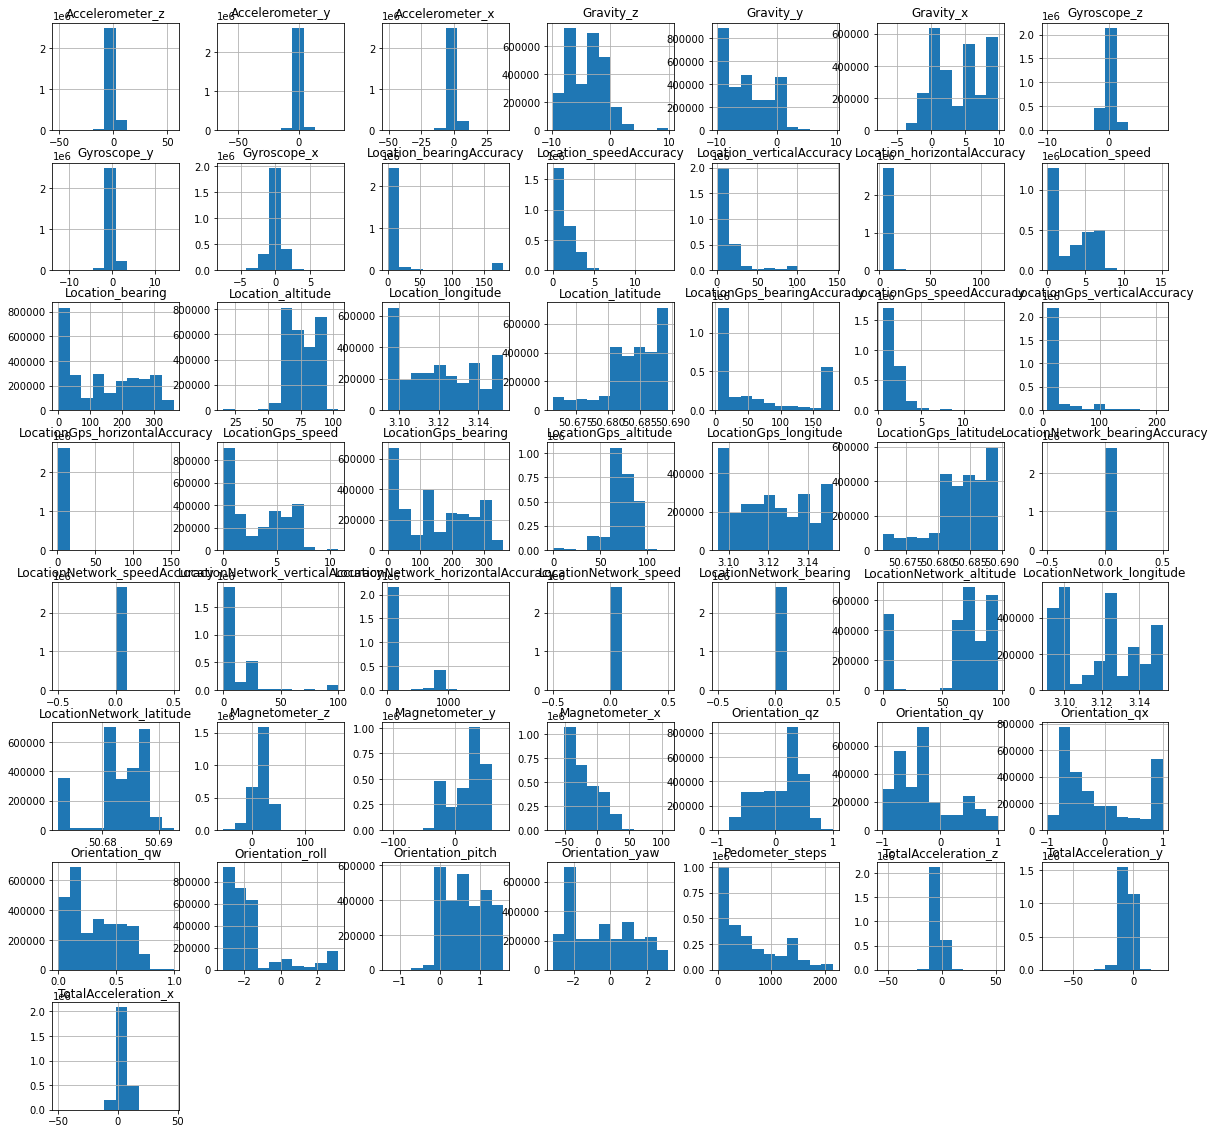

In [23]:
df_original.hist(figsize=(20,20))

### columns LocationNetwork_bearingAccuracy, LocationNetwork_speedAccuracy, LocationNetwork_horizontalAccuracy, LocationNetwork_speed,LocationNetwork_bearing, Location_horizontalAccuracy, LocationGps_horizontalAccuracy to check

In [24]:
print(df_original['LocationNetwork_bearingAccuracy'].describe())
print(df_original['LocationNetwork_speedAccuracy'].describe())
print(df_original['LocationNetwork_horizontalAccuracy'].describe())
print(df_original['LocationNetwork_speed'].describe())
print(df_original['LocationNetwork_bearing'].describe())
print(df_original['Location_horizontalAccuracy'].describe())

count    2658503.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_bearingAccuracy, dtype: float64
count    2658503.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_speedAccuracy, dtype: float64
count    2.658503e+06
mean     2.064067e+02
std      3.070169e+02
min      1.150500e+01
25%      1.650200e+01
50%      5.496600e+01
75%      1.496000e+02
max      1.899999e+03
Name: LocationNetwork_horizontalAccuracy, dtype: float64
count    2658503.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_speed, dtype: float64
count    2658503.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: Loc

### almost all columns from above are 0 - delete them

In [25]:
df_original = df_original.drop(columns=['LocationNetwork_bearingAccuracy','LocationNetwork_speedAccuracy','LocationNetwork_speed','LocationNetwork_bearing','Location_horizontalAccuracy'])
df_cyclings = df_cyclings.drop(columns=['LocationNetwork_bearingAccuracy','LocationNetwork_speedAccuracy','LocationNetwork_speed','LocationNetwork_bearing','Location_horizontalAccuracy'])
df_sittings = df_sittings.drop(columns=['LocationNetwork_bearingAccuracy','LocationNetwork_speedAccuracy','LocationNetwork_speed','LocationNetwork_bearing','Location_horizontalAccuracy'])
df_walkings = df_walkings.drop(columns=['LocationNetwork_bearingAccuracy','LocationNetwork_speedAccuracy','LocationNetwork_speed','LocationNetwork_bearing','Location_horizontalAccuracy'])

In [26]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775511 entries, 0 to 2775510
Data columns (total 47 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   time                                object 
 1   Accelerometer_z                     float64
 2   Accelerometer_y                     float64
 3   Accelerometer_x                     float64
 4   Gravity_z                           float64
 5   Gravity_y                           float64
 6   Gravity_x                           float64
 7   Gyroscope_z                         float64
 8   Gyroscope_y                         float64
 9   Gyroscope_x                         float64
 10  Location_bearingAccuracy            float64
 11  Location_speedAccuracy              float64
 12  Location_verticalAccuracy           float64
 13  Location_speed                      float64
 14  Location_bearing                    float64
 15  Location_altitude                   float64
 16  

## Correlation heatmap

In [29]:
df_original['time'] = pd.to_datetime(df_original['time'])
df_original['time'] = df_original['time'].apply(lambda x: x.timestamp())
df_original.dropna(inplace=True)

## Correlation heatmap

DF ORIGINAL


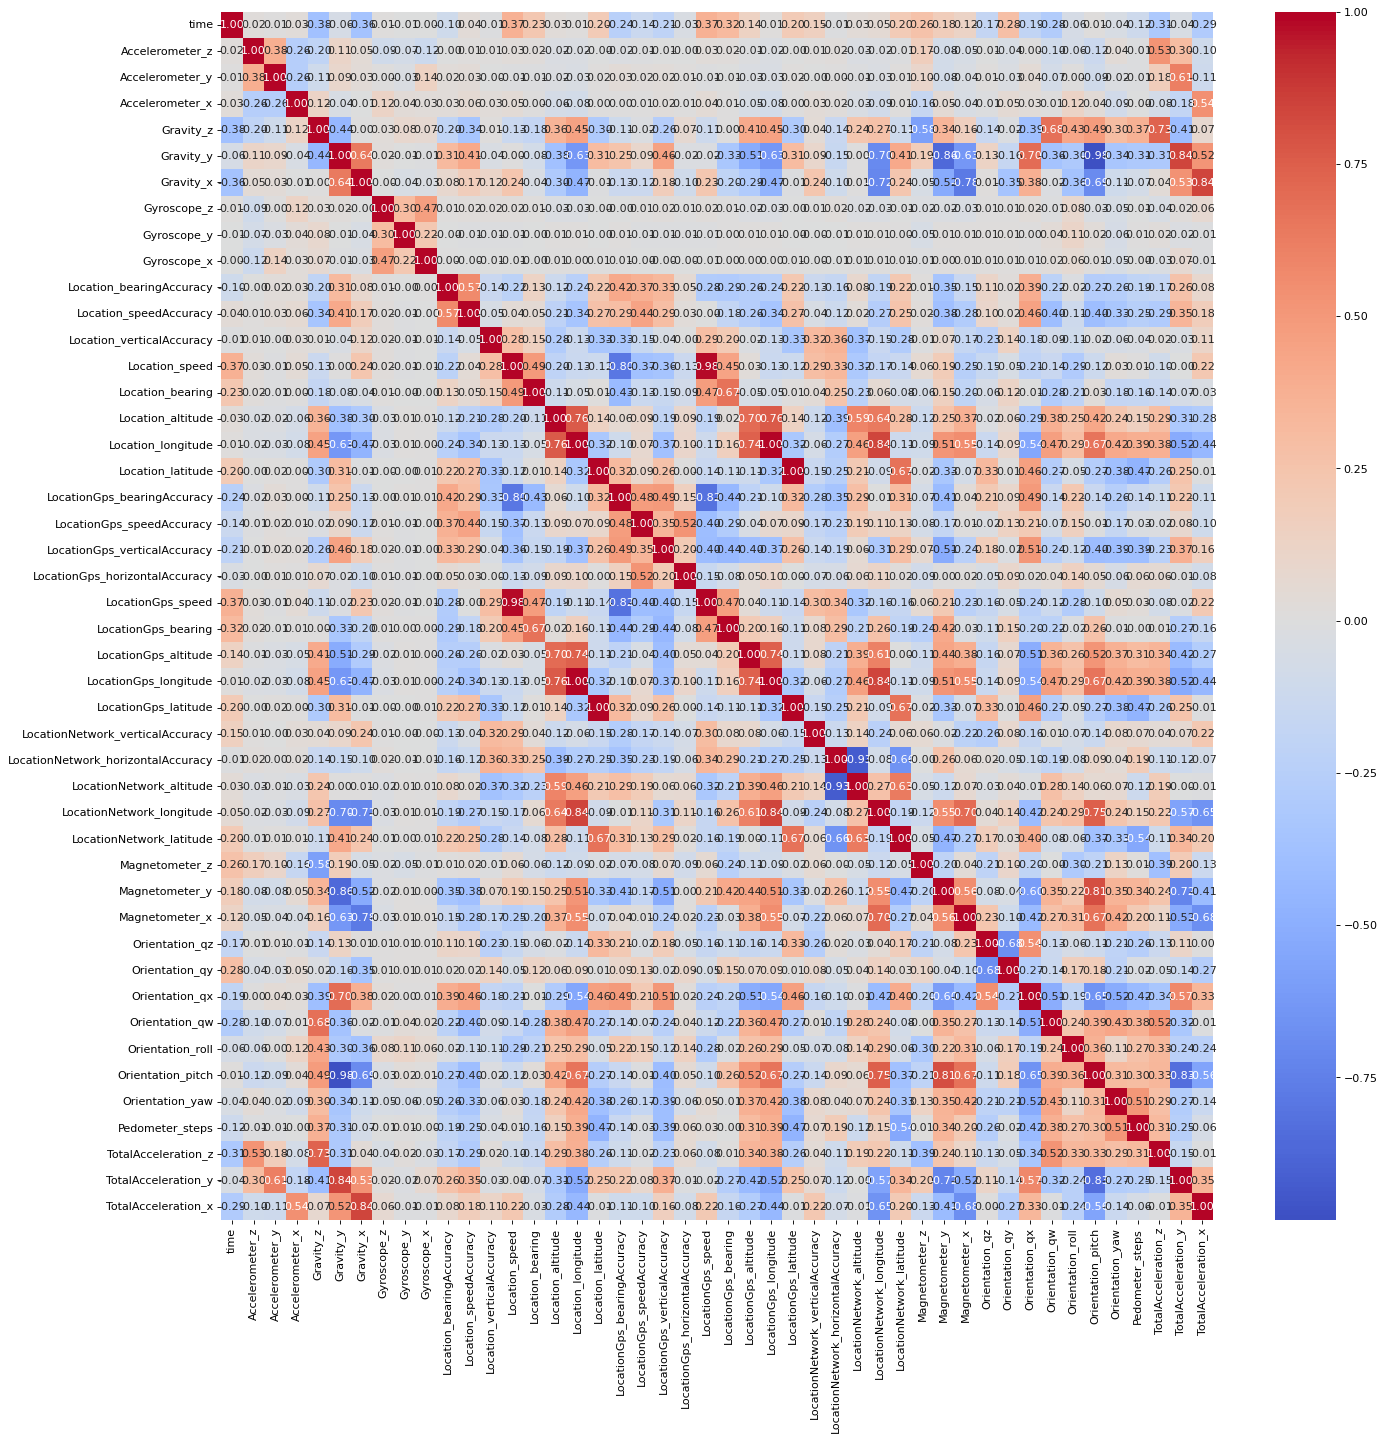

In [30]:
df_original_corr = df_original.loc[:,df_original.columns != 'TYPE'].corr()
print("DF ORIGINAL")
fig = plt.figure(figsize=(20,20), dpi=80)
sns.heatmap(df_original_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

### KMeans clustering

In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df_original.loc[:,df_original.columns != 'TYPE'])
labels = model.predict(df_original.loc[:,df_original.columns != 'TYPE'])
print(labels)


[0 0 0 ... 1 1 1]


In [32]:
print(model.inertia_)

360334823509.87805


In [33]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': df_original['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE,Cycling,Sitting,Walking
labels,,,
0,870520,395021,307080
1,428116,0,293067
2,364697,0,0


#### Standarization

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df_original.loc[:,df_original.columns != 'TYPE'])
labels = pipeline.predict(df_original.loc[:,df_original.columns != 'TYPE'])

In [36]:
kmeans.inertia_

85649752.60184564

In [37]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': df_original['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE,Cycling,Sitting,Walking
labels,,,
0,160214,0,577993
1,4562,395021,113
2,1498557,0,22041
